# Generování náhodné veličiny

In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

num_samples = 1_000_000

Nejprve vygeneruji $1000000$ hodnot $Y$ pro $Y \sim (0,1)$ a pak spočtu střední hodnotu $\mathbb{E}[Y]$ pomocí aritmetického průměru. Z přednášky víme, že tato hodnota by se měla blížit $\frac{1}{2}$

In [20]:
data_y = [random.uniform(0,1) for i in range(num_samples)]
mean_y = np.sum(data_y) / len(data_y)
print(f"E[Y] = {mean_y}")

E[Y] = 0.49981862785935877


Nejprve spočtu rozptyl $ var(Y) = \mathbb{E}[(\mathbb{E}[Y]-Y)^2]$ a odmocninou této hodnoty získám směrodatnou odchylku. Pomocí vzorečku z přednášky vím, že: $ var(Y) = \mathbb{E}[Y^2] - (\mathbb{E}[Y])^2$ a spočtením získám hodnotu $var(Y) = \frac{1}{12}$ a tedy $\sigma(Y) = \frac{1}{\sqrt{12}}$

In [21]:
sum = 0
for i in range(len(data_y)):
    sum += (data_y[i] - mean_y) ** 2
stdev_y = math.sqrt(sum / len(data_y))
print(f"sigma(Y) = {stdev_y}")

sigma(Y) = 0.2887080505478721


Dále spočtu $P(Y \leq 0.4)$

In [22]:
sum = 0
for i in range(len(data_y)):
    sum += data_y[i] <= 0.4
p_leq = sum / len(data_y)
print(f"P(Y<=0.4) = {p_leq}")

P(Y<=0.4) = 0.400667


Nyní si vygeneruji hodnoty pro náhodnou veličinu $X = \frac{1}{Y}$ a spočítám střední hodnotu, která by však podle vzorečku měla vyjít $ln(1)-ln(0)$, což je hodnota jdoucí k $\infty$. (Pokud celý kód spustíme znovu, je vidět, že výsledek je pokaždé jiný)

In [23]:
data_x = [1/y for y in data_y]
mean_x = np.mean(data_x)
print(f"E[X] = {mean_x}")

E[X] = 12.954974957297575


Podobné je to i se směrodatnou odchylkou.

In [24]:
stdev_x = np.std(data_x)
print(f"sgima(X) = {stdev_x}")

sgima(X) = 1007.0288416346881


Poslední výpočet je hodnota $P(2 \leq X \leq 3)$. 

Ta by mělá odpovídat hodnotě $P(\frac{1}{3} \leq Y \leq \frac{1}{2}) = \frac{1}{6}$.

In [25]:
sum = 0
for i in range(len(data_x)):
    sum += 2 <= data_x[i] <= 3
p_intvl = sum / len(data_x)
print(f"P(2<=X<=3) = {p_intvl}")

P(2<=X<=3) = 0.166296


Nyní ještě nakreslím histogram pro veličinu $X$

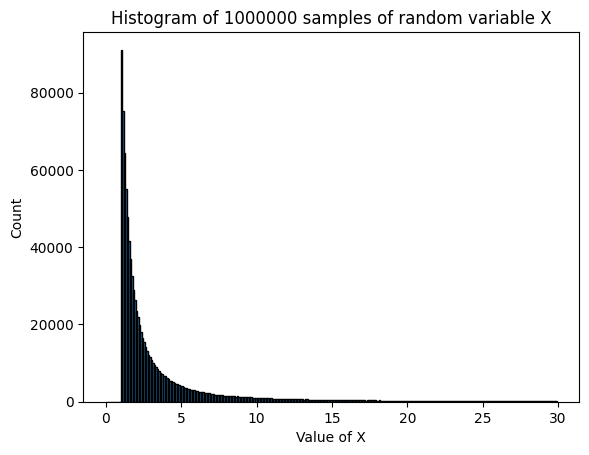

In [26]:
plt.title(f"Histogram of {num_samples} samples of random variable X")
plt.xlabel("Value of X")
plt.ylabel("Count")
plt.hist(data_x,bins=np.arange(0,30,0.1),edgecolor='black')
plt.show()